importing the dependencies

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# The file 'creditcard.csv' was not found. Please ensure the file is uploaded to your Colab environment or provide the correct path.
data=pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.shape

(61491, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61491 entries, 0 to 61490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    61491 non-null  int64  
 1   V1      61491 non-null  float64
 2   V2      61491 non-null  float64
 3   V3      61491 non-null  float64
 4   V4      61491 non-null  float64
 5   V5      61491 non-null  float64
 6   V6      61491 non-null  float64
 7   V7      61491 non-null  float64
 8   V8      61491 non-null  float64
 9   V9      61491 non-null  float64
 10  V10     61491 non-null  float64
 11  V11     61491 non-null  float64
 12  V12     61491 non-null  float64
 13  V13     61491 non-null  float64
 14  V14     61491 non-null  float64
 15  V15     61491 non-null  float64
 16  V16     61491 non-null  float64
 17  V17     61491 non-null  float64
 18  V18     61491 non-null  float64
 19  V19     61491 non-null  float64
 20  V20     61491 non-null  float64
 21  V21     61491 non-null  float64
 22

In [7]:
#Check Missing Values

data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
#Check Class Distribution
#0 → Normal transaction
#1 → Fraud transaction

data['Class'].value_counts()

,count
Class,
0.0,61327
1.0,163


In [9]:
# Separate Legit & Fraud Transactions
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(61327, 31)
(163, 31)


In [11]:
# take equal number of normal transactions as fraud cases.
legit_sample = legit.sample(n=492)

In [12]:
new_data = pd.concat([legit_sample, fraud], axis=0)

In [13]:
new_data['Class'].value_counts()

,count
Class,
0.0,492
1.0,163


In [14]:
# Split Features & Target
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [15]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

In [16]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Model Evaluation
##  Training Accuracy
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9732824427480916


In [18]:
## Testing Accuracy
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9694656488549618


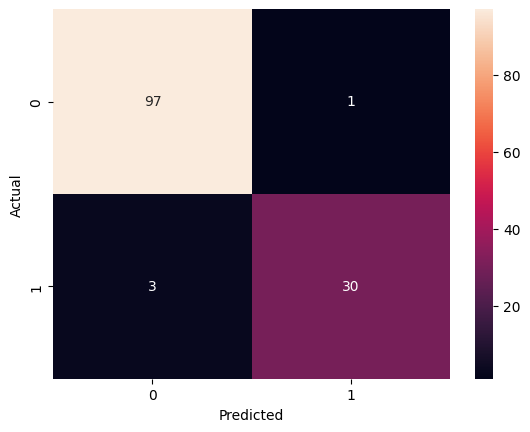

In [21]:
## Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
## Classification Report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        98
         1.0       0.97      0.91      0.94        33

    accuracy                           0.97       131
   macro avg       0.97      0.95      0.96       131
weighted avg       0.97      0.97      0.97       131

